In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel('cardio_train.xlsx')

# Menghapus data yang tidak diperlukan.
df = df.drop('CLASS cardio', axis=1)
df = df.drop('id', axis=1)

# Mengubah kolom 'age' dari hitungan hari menjadi tahun.
df['age'] = df['age'] // 365
df

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,1,1,0,0,1
1,55,1,156,85.0,3,1,0,0,1
2,51,1,165,64.0,3,1,0,0,0
3,48,2,169,82.0,1,1,0,0,1
4,47,1,156,56.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,1,1,1,0,1
69996,61,1,158,126.0,2,2,0,0,1
69997,52,2,183,105.0,3,1,0,1,0
69998,61,1,163,72.0,1,2,0,0,0


In [31]:
missing_value = df.isnull()
for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print('')

age
age
False    70000
Name: count, dtype: int64

gender
gender
False    70000
Name: count, dtype: int64

height
height
False    70000
Name: count, dtype: int64

weight
weight
False    70000
Name: count, dtype: int64

cholesterol
cholesterol
False    70000
Name: count, dtype: int64

gluc
gluc
False    70000
Name: count, dtype: int64

smoke
smoke
False    70000
Name: count, dtype: int64

alco
alco
False    70000
Name: count, dtype: int64

active
active
False    70000
Name: count, dtype: int64



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   cholesterol  70000 non-null  int64  
 5   gluc         70000 non-null  int64  
 6   smoke        70000 non-null  int64  
 7   alco         70000 non-null  int64  
 8   active       70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [33]:
normalisasi = (df - df.min()) / (df.max() - df.min())
df = normalisasi
df

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,0.600000,1.0,0.579487,0.273684,0.0,0.0,0.0,0.0,1.0
1,0.742857,0.0,0.517949,0.394737,1.0,0.0,0.0,0.0,1.0
2,0.628571,0.0,0.564103,0.284211,1.0,0.0,0.0,0.0,0.0
3,0.542857,1.0,0.584615,0.378947,0.0,0.0,0.0,0.0,1.0
4,0.514286,0.0,0.517949,0.242105,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69995,0.657143,1.0,0.579487,0.347368,0.0,0.0,1.0,0.0,1.0
69996,0.914286,0.0,0.528205,0.610526,0.5,0.5,0.0,0.0,1.0
69997,0.657143,1.0,0.656410,0.500000,1.0,0.0,0.0,1.0,0.0
69998,0.914286,0.0,0.553846,0.326316,0.0,0.5,0.0,0.0,0.0


<Axes: >

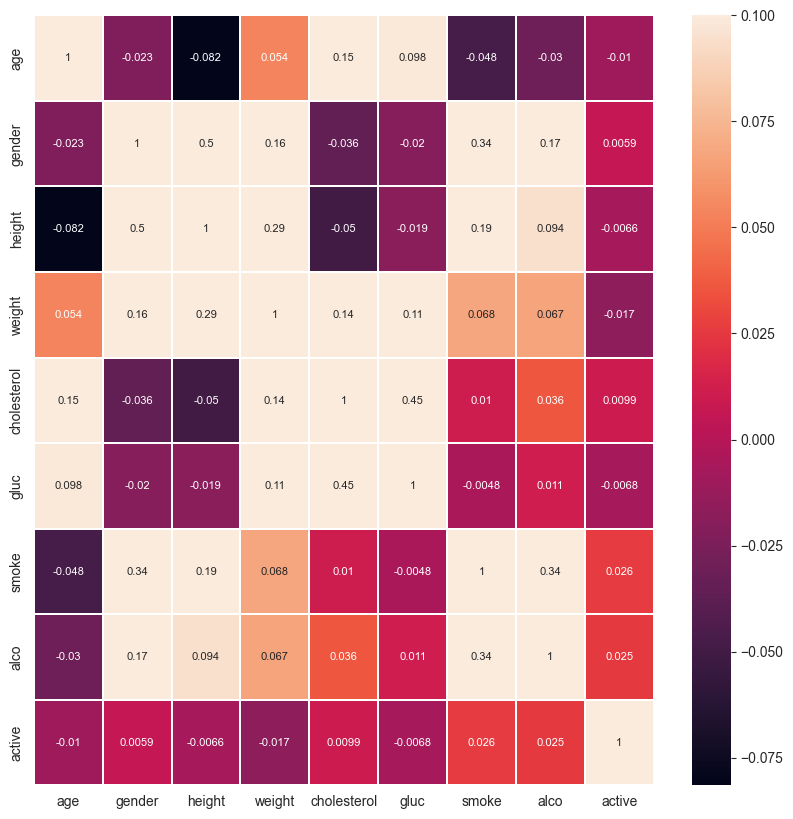

In [34]:
df_korelasi = df[['age','gender','height','weight','cholesterol','gluc','smoke','alco','active']].corr()
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df_korelasi, linewidths=.05, vmax=0.1, annot=True, annot_kws={'fontsize':8})

In [35]:
df = pd.DataFrame(df_korelasi)
df

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.022913,-0.081506,0.053561,0.154012,0.098388,-0.047649,-0.029756,-0.009998
gender,-0.022913,1.000000,0.499033,0.155406,-0.035821,-0.020491,0.338135,0.170966,0.005866
height,-0.081506,0.499033,1.000000,0.290968,-0.050226,-0.018595,0.187989,0.094419,-0.006570
weight,0.053561,0.155406,0.290968,1.000000,0.141768,0.106857,0.067780,0.067113,-0.016867
cholesterol,0.154012,-0.035821,-0.050226,0.141768,1.000000,0.451578,0.010354,0.035760,0.009911
gluc,0.098388,-0.020491,-0.018595,0.106857,0.451578,1.000000,-0.004756,0.011246,-0.006770
smoke,-0.047649,0.338135,0.187989,0.067780,0.010354,-0.004756,1.000000,0.340094,0.025858
alco,-0.029756,0.170966,0.094419,0.067113,0.035760,0.011246,0.340094,1.000000,0.025476
active,-0.009998,0.005866,-0.006570,-0.016867,0.009911,-0.006770,0.025858,0.025476,1.000000


In [36]:
# Normalisasi data height dan weight agar kedua nilai memiliki range yang tidak terlalu jauh. Sehingga, dapat memudahkan peritungan.
normalisasi = (df - df.min()) / (df.max() - df.min())
df = normalisasi
df

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
age,1.000000,0.012462,0.000000,0.069259,0.194471,0.116492,0.000000,0.000000,0.006754
gender,0.054177,1.000000,0.536788,0.169415,0.013716,0.000000,0.368238,0.194923,0.022355
height,0.000000,0.516358,1.000000,0.302729,0.000000,0.001858,0.224921,0.120587,0.010126
weight,0.124888,0.184614,0.344403,1.000000,0.182812,0.124791,0.110179,0.094070,0.000000
cholesterol,0.217769,0.000000,0.028923,0.156003,1.000000,0.462590,0.055365,0.063624,0.026334
gluc,0.166337,0.014800,0.058170,0.121672,0.477805,1.000000,0.040941,0.039817,0.009930
smoke,0.031306,0.361024,0.249185,0.083243,0.057683,0.015419,1.000000,0.359163,0.042016
alco,0.047850,0.199637,0.162666,0.082587,0.081874,0.031100,0.370107,1.000000,0.041640
active,0.066119,0.040245,0.069289,0.000000,0.057261,0.013446,0.070163,0.053636,1.000000
